# Exploratory Data Analysis on the following data:

In [57]:
#https://www.kaggle.com/datasnaek/youtube-new

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
sns.set()
import os
from IPython.display import display

In [59]:
pwd = os.getcwd()
for file in os.listdir(pwd):
    if file.endswith('.csv'):
        print(file)

CAvideos.csv
DEvideos.csv
FRvideos.csv
GBvideos.csv
USvideos.csv


In [60]:
CAvideos = pd.read_csv('CAvideos.csv')
DEvideos = pd.read_csv('DEvideos.csv')
FRvideos = pd.read_csv('FRvideos.csv')
GBvideos = pd.read_csv('GBvideos.csv')
USvideos = pd.read_csv('USvideos.csv')

In [61]:
CAvideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [62]:
CAvideos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35283 entries, 0 to 35282
Data columns (total 16 columns):
video_id                  35283 non-null object
trending_date             35283 non-null object
title                     35283 non-null object
channel_title             35283 non-null object
category_id               35283 non-null int64
publish_time              35283 non-null object
tags                      35283 non-null object
views                     35283 non-null int64
likes                     35283 non-null int64
dislikes                  35283 non-null int64
comment_count             35283 non-null int64
thumbnail_link            35283 non-null object
comments_disabled         35283 non-null bool
ratings_disabled          35283 non-null bool
video_error_or_removed    35283 non-null bool
description               34143 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 3.6+ MB


In [74]:
CAchannels_likes = CAvideos.groupby('channel_title')['likes'].aggregate('sum').reset_index()
CAchannels_likes = CAchannels_likes.sort_values('likes', ascending=False)
CAchannels_likes.head(20)

,channel_title,likes
2231,Marvel Entertainment,32892782
2726,PewDiePie,30495536
1020,Dude Perfect,25389983
4246,ibighit,24119131
2095,Logan Paul Vlogs,19592343
1062,Ed Sheeran,18483506
3431,TaylorSwiftVEVO,18271131
1085,EminemVEVO,18160439
4060,YouTube Spotlight,16713032
692,ChildishGambinoVEVO,14593916


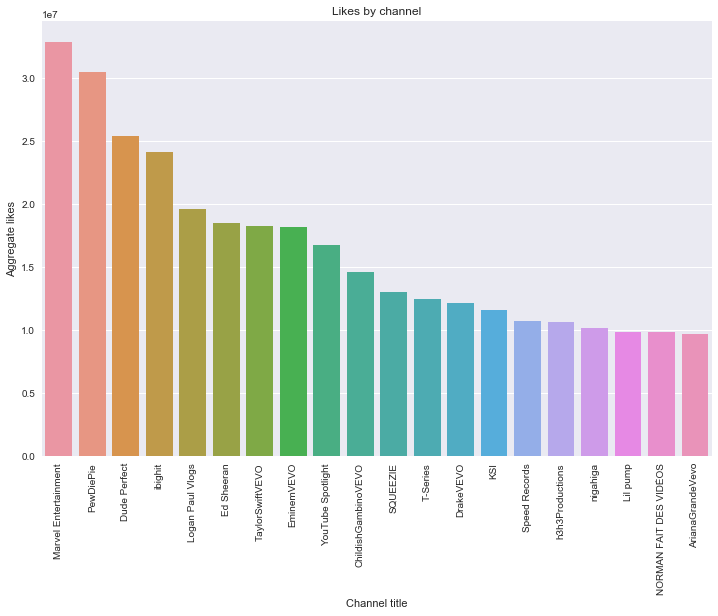

In [75]:
plt.figure(figsize=(12,8))
sns.barplot(CAchannels_likes.channel_title.head(20), CAchannels_likes.likes.head(20))
plt.xlabel('Channel title')
plt.ylabel('Aggregate likes')
plt.title('Likes by channel')
plt.xticks(rotation='vertical')
plt.show()

Marvel Entertainment is the most liked channel in Canada; not surprising, im sure that a lot of content that they offer attracts a large audience (movie trailers and what not).

Lets look at the most viewed channels.

In [78]:
CAchannels_views = CAvideos.groupby('channel_title')['views'].aggregate('sum').reset_index()
CAchannels_views = CAchannels_views.sort_values('views',ascending=False)
CAchannels_views.head(20)

,channel_title,views
2231,Marvel Entertainment,1011420205
3331,T-Series,663452499
1020,Dude Perfect,646068473
4060,YouTube Spotlight,631822765
2726,PewDiePie,419356239
19,20th Century Fox,414359921
692,ChildishGambinoVEVO,411775069
1062,Ed Sheeran,385566686
3431,TaylorSwiftVEVO,374678625
3233,Sony Pictures Entertainment,361206316


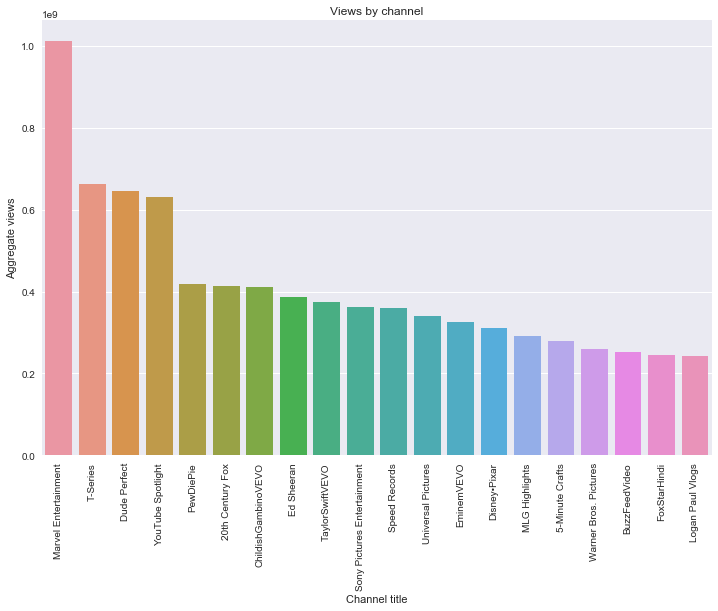

In [80]:
plt.figure(figsize=(12,8))
sns.barplot(CAchannels_views.channel_title.head(20), CAchannels_views.views.head(20))
plt.xlabel('Channel title')
plt.ylabel('Aggregate views')
plt.title('Views by channel')
plt.xticks(rotation='vertical')
plt.show()

Pretty similar to what we saw before, it makes sense that there would be a correlation between likes and views.

Lets check out the channels with the most dislikes.

In [81]:
CAchannels_dislikes = CAvideos.groupby('channel_title')['dislikes'].aggregate('sum').reset_index()
CAchannels_dislikes = CAchannels_dislikes.sort_values('dislikes',ascending=False)
CAchannels_dislikes.head(20)

,channel_title,dislikes
4060,YouTube Spotlight,8470617
1691,Jake Paul,4302970
2095,Logan Paul Vlogs,2453896
3431,TaylorSwiftVEVO,962785
3331,T-Series,883769
2154,MLG Highlights,878948
2726,PewDiePie,841364
692,ChildishGambinoVEVO,689948
2066,Lil pump,661009
1085,EminemVEVO,626363


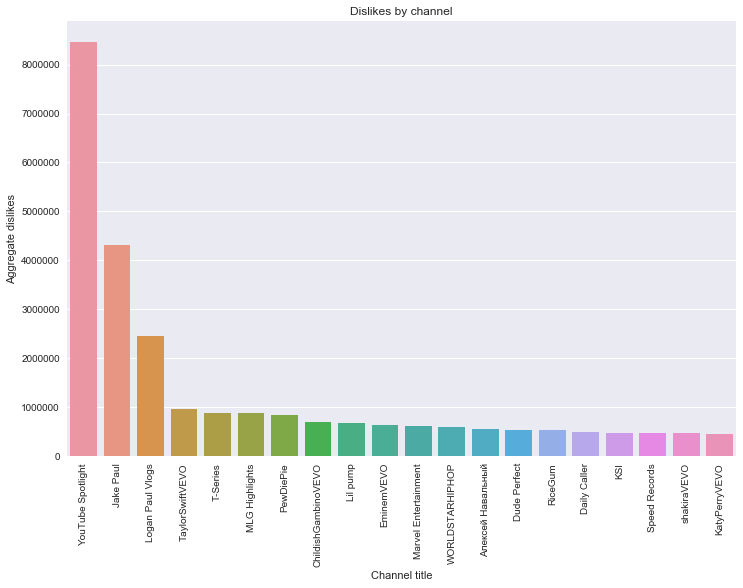

In [83]:
plt.figure(figsize=(12,8))
sns.barplot(CAchannels_dislikes.channel_title.head(20), CAchannels_dislikes.dislikes.head(20))
plt.xlabel('Channel title')
plt.ylabel('Aggregate dislikes')
plt.title('Dislikes by channel')
plt.xticks(rotation='vertical')
plt.show()

We can see that a few of the channels we were seeing the in previous charts are in this chart as well. This makes sense, as a channel that gets a lot of views will most likely have a lot of both likes and dislikes.

In [106]:
CAvideos['trending_date'] = pd.to_datetime(CAvideos['trending_date'], format='%y.%d.%m')